## Scikit-learn

In this notebook, we'll introduce the scikit-learn package and implement the K-Means clustering algorithm on two example datasets.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')

## K-Means Clustering

First let's create some simple 2-dimensional data that we will use to illustrate K-means clustering.

In [2]:
from sklearn.datasets import make_blobs

X, y = make_blobs(
    n_samples=150, n_features=2,
    centers=3, cluster_std=0.5,
    shuffle=True, random_state=0
)

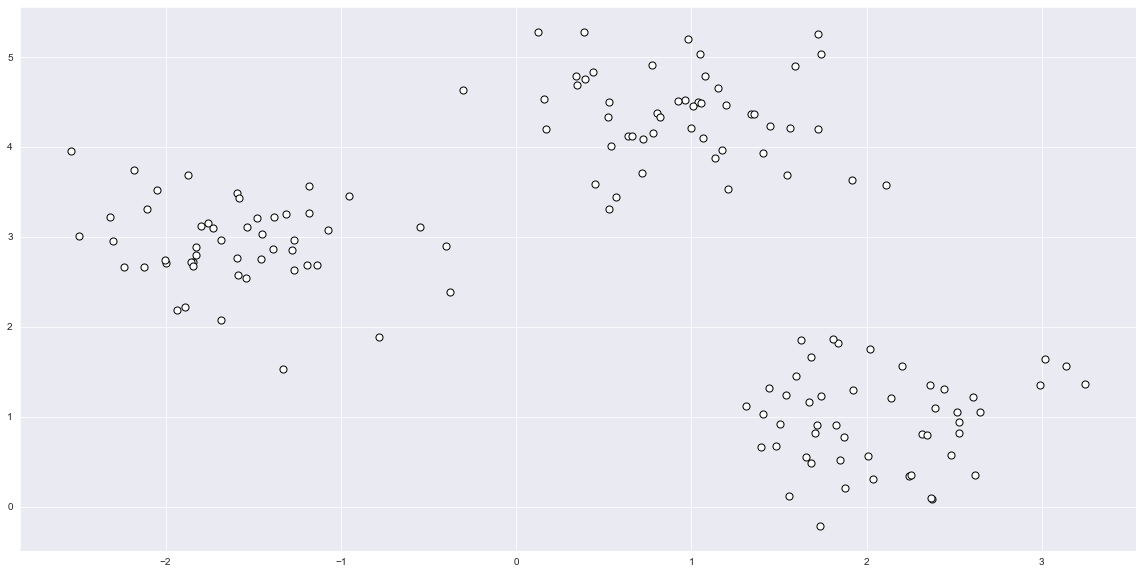

In [3]:
plt.figure(figsize=(20, 10))
plt.scatter(
    X[:, 0], X[:, 1],
    c='w', marker='o',
    edgecolor='k', s=50
)
plt.show()

### K-Means Algorithm

1. Randomly pick *k* centroids as initial cluster centers.
2. Assign each datapoint to the nearest centroid.
3. Move the centroids to the center of the datapoints assigned to it.
4. Repeat steps 2 & 3 until convergence, i.e. the cluster assignments do not change.

*How do we measure similarity between objects?*  
We use a distance metric, such as **Euclidean distance**.

### Initialize our model with appropriate parameters

In [4]:
from sklearn.cluster import KMeans

km = KMeans(
    n_clusters=3,
    init='random',
    n_init=10,
    max_iter=300,
    tol=1e-4,
    random_state=0
)

### Fit the model to our data

In [5]:
km.fit(X)

KMeans(init='random', n_clusters=3, random_state=0)

### Predict the cluster assignment for each data point

In [6]:
y_pred = km.predict(X)

In [7]:
y_pred

array([1, 0, 0, 0, 1, 0, 0, 1, 2, 0, 1, 2, 2, 0, 0, 2, 2, 1, 2, 1, 0, 1,
       0, 0, 2, 1, 1, 0, 2, 1, 2, 2, 2, 2, 0, 1, 1, 1, 0, 0, 2, 2, 0, 1,
       1, 1, 2, 0, 2, 0, 1, 0, 0, 1, 1, 2, 0, 1, 2, 0, 2, 2, 2, 2, 0, 2,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 2, 2, 0, 1, 1, 0, 0, 1, 1, 1, 2,
       2, 1, 1, 0, 1, 0, 1, 0, 2, 2, 1, 1, 1, 1, 2, 1, 1, 0, 2, 0, 0, 0,
       2, 0, 1, 2, 0, 2, 0, 0, 2, 2, 0, 1, 0, 0, 1, 1, 2, 1, 2, 2, 2, 2,
       1, 2, 2, 2, 0, 2, 1, 2, 0, 0, 1, 1, 2, 2, 2, 2, 1, 1])

### Plot our clusters

In [8]:
def plot_cluster(X, y_pred, cluster_label, color='k', marker='.'):
    cluster_matches = (y_pred == cluster_label)
    plt.scatter(
        X[cluster_matches, 0], X[cluster_matches, 1],
        c=color, marker=marker,
        edgecolor='k', s=50,
        label=f'Cluster {cluster_label+1}'
    )

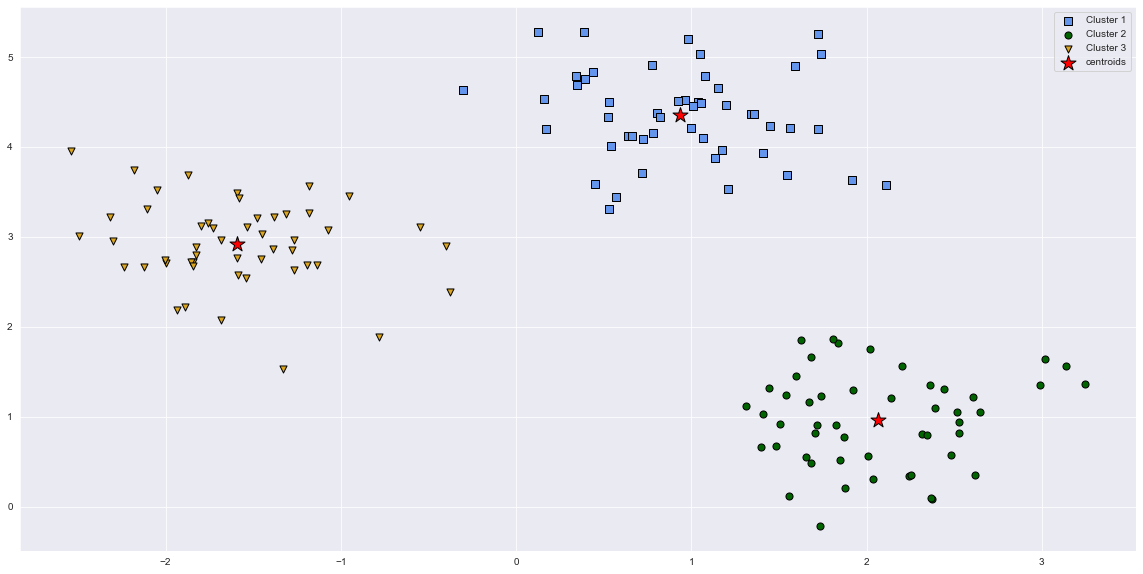

In [9]:
plt.figure(figsize=(20,10))

# Plot clusters
plot_cluster(X, y_pred, cluster_label=0, color='cornflowerblue', marker='s')
plot_cluster(X, y_pred, cluster_label=1, color='darkgreen', marker='o')
plot_cluster(X, y_pred, cluster_label=2, color='goldenrod', marker='v')

# Plot centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    c='r', marker='*',
    edgecolor='k', s=250,
    label='centroids'
)

plt.legend()
plt.show()

## Choosing *k* with the Elbow Method

In [10]:
errors = []

k_range = range(1, 11)
for i in k_range:
    km = KMeans(
        n_clusters=i,
        init='random',
        random_state=0
    )
    km.fit(X)
    errors.append(km.inertia_)

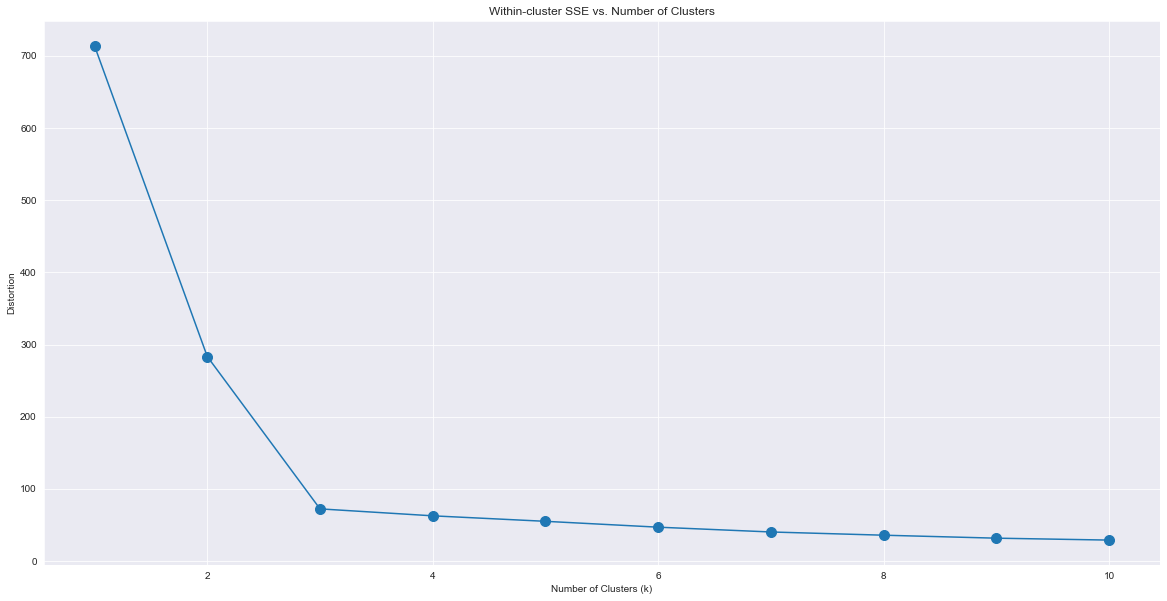

In [11]:
plt.figure(figsize=(20, 10))
plt.plot(k_range, errors, marker='o', markersize=10)
plt.title('Within-cluster SSE vs. Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion')
plt.show()

By default sklearn will use the **kmeans++** initialization which will improve clustering results

## KMeans Clustering on handwritten digits

In [12]:
from sklearn.datasets import load_digits
import numpy as np

data, labels = load_digits(return_X_y=True)

n_samples, n_features = data.shape
n_labels = np.unique(labels).size

In [13]:
print(f'Num datapoints: {n_samples}')
print(f'Feature dimension: {n_features}')
print(f'Num classes: {n_labels}')

Num datapoints: 1797
Feature dimension: 64
Num classes: 10


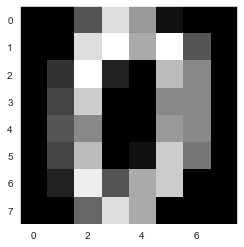

In [14]:
sample_num = 0

plt.imshow(
    data[sample_num].reshape(8, 8),
    cmap='gray'
)
plt.grid(None)
plt.show()

## Normalize our raw data

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_data = scaler.fit_transform(data)

In [16]:
data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [17]:
scaled_data

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

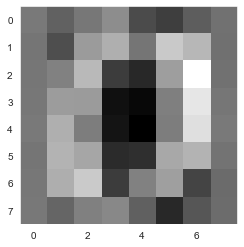

In [18]:
plt.imshow(
    scaled_data[sample_num].reshape(8, 8),
    cmap='gray'
)
plt.grid(None)
plt.show()

### Use PCA to reduce our data from 64 dimension to 2 so we can visualize it

In [19]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)

### Apply K-means clustering on our reduced data

In [20]:
km = KMeans(
    n_clusters=n_labels,
    init='k-means++',
    n_init=5,
    random_state=2021
)
km.fit(reduced_data)

KMeans(n_clusters=10, n_init=5, random_state=2021)

## Plot the decision boundaries for our clusters

In [21]:
x_min, x_max = reduced_data[:, 0].min() + 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() + 1, reduced_data[:, 1].max() + 1

# Step size of mesh
h = 0.02

x_mesh, y_mesh = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

In [22]:
mesh_pred = km.predict(np.column_stack((x_mesh.ravel(), y_mesh.ravel())))

mesh_pred = mesh_pred.reshape(x_mesh.shape)

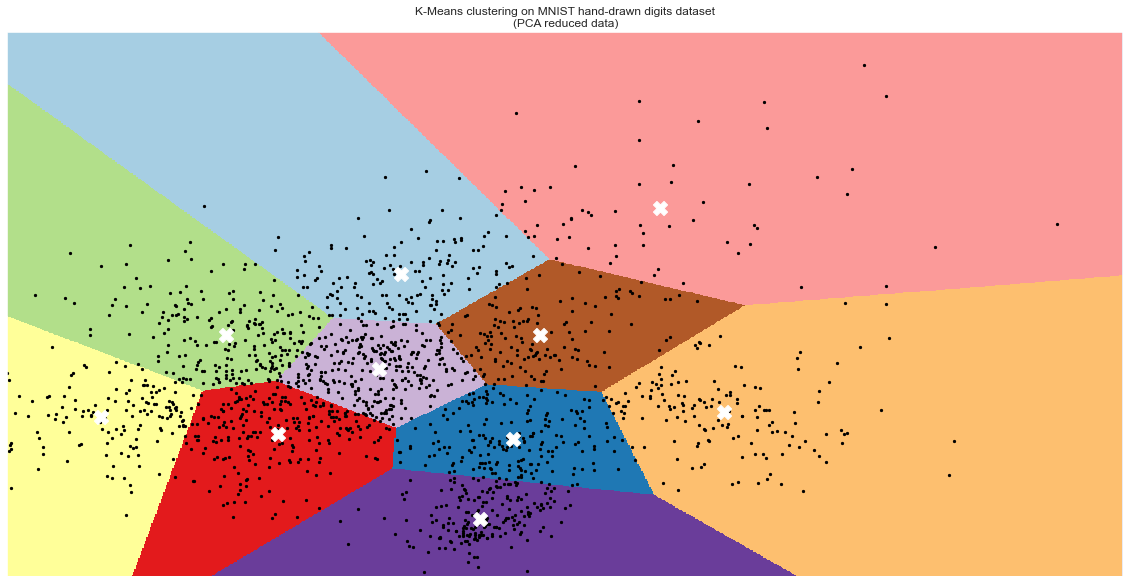

In [23]:
plt.figure(figsize=(20, 10))

# Plot mesh (decision boundary)
plt.imshow(
    mesh_pred, interpolation='nearest',
    extent=(x_mesh.min(), x_mesh.max(), y_mesh.min(), y_mesh.max()),
    cmap=plt.cm.Paired, aspect='auto', origin='lower'
)

# Plot reduced dimensionality data points
plt.scatter(
    reduced_data[:, 0], reduced_data[:, 1],
    c='k', marker='.', s=20
)

# Plot centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    c='w', marker='X', s=200, linewidth=1, zorder=10
)

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

plt.title('K-Means clustering on MNIST hand-drawn digits dataset\n(PCA reduced data)')
plt.xticks(())
plt.yticks(())
plt.show()

## Check our accuracy on the ground truth labels

PCA reduced, normalized data

In [24]:
from sklearn.metrics import accuracy_score

accuracy_score(labels, km.labels_)

0.02003338898163606

Full dimensionality, normalized data

In [25]:
km = KMeans(
    n_clusters=n_labels,
    init='k-means++',
    n_init=5,
    random_state=2021
)
km.fit(scaled_data)

KMeans(n_clusters=10, n_init=5, random_state=2021)

In [26]:
accuracy_score(labels, km.labels_)

0.08013355592654424

Full dimensionality, raw data

In [27]:
km = KMeans(
    n_clusters=n_labels,
    init='k-means++',
    n_init=5,
    random_state=2021
)
km.fit(data)

KMeans(n_clusters=10, n_init=5, random_state=2021)

In [28]:
accuracy_score(labels, km.labels_)

0.03728436282693378

### Neural Network Classifier

In [29]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes=(64))
clf.fit(data, labels)

MLPClassifier(hidden_layer_sizes=64)

In [30]:
clf.score(data, labels)

1.0